<a href="https://colab.research.google.com/github/rwyates/portfolio/blob/main/NYC_Collision_Patterns_by_Income_Level_(TDSP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#NYC Collision Patterns by Income Level (TDSP)

##Data Preparation & Pre-Processing

In [4]:
data = pd.read_csv("/content/drive/MyDrive/TDSP_Project/Motor_Vehicle_Collisions_-_Crashes_20250127.csv")
data.head()

<ipython-input-4-3c8083fdf790>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/TDSP_Project/Motor_Vehicle_Collisions_-_Crashes_20250127.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
desc_stats = data.describe()
desc_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
LATITUDE,1911572.0,4.061878e+01,2.068666e+00,0.00000,4.066752e+01,4.072052e+01,4.076961e+01,4.334444e+01
LONGITUDE,1911572.0,-7.373590e+01,3.873375e+00,-201.35999,-7.397469e+01,-7.392705e+01,-7.386673e+01,0.000000e+00
NUMBER OF PERSONS INJURED,2151150.0,3.199614e-01,7.083777e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF PERSONS KILLED,2151137.0,1.544300e-03,4.146681e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
NUMBER OF PEDESTRIANS INJURED,2151168.0,5.823813e-02,2.474319e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER OF PEDESTRIANS KILLED,2151168.0,7.656306e-04,2.822509e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER OF CYCLIST INJURED,2151168.0,2.796667e-02,1.670092e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER OF CYCLIST KILLED,2151168.0,1.199348e-04,1.099319e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER OF MOTORIST INJURED,2151168.0,2.295232e-01,6.695449e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF MOTORIST KILLED,2151168.0,6.303552e-04,2.746892e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [6]:
#Find percentages and counts of missing values in each column
missing_values = data.isnull().sum()

missing_values_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2141837,99.566236
CONTRIBUTING FACTOR VEHICLE 5,2141540,99.552429
VEHICLE TYPE CODE 4,2117169,98.419510
CONTRIBUTING FACTOR VEHICLE 4,2115904,98.360705
VEHICLE TYPE CODE 3,2002017,93.066511
CONTRIBUTING FACTOR VEHICLE 3,1996155,92.794008
OFF STREET NAME,1781236,82.803203
CROSS STREET NAME,820302,38.132865
ZIP CODE,666730,30.993860
BOROUGH,666464,30.981495


Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

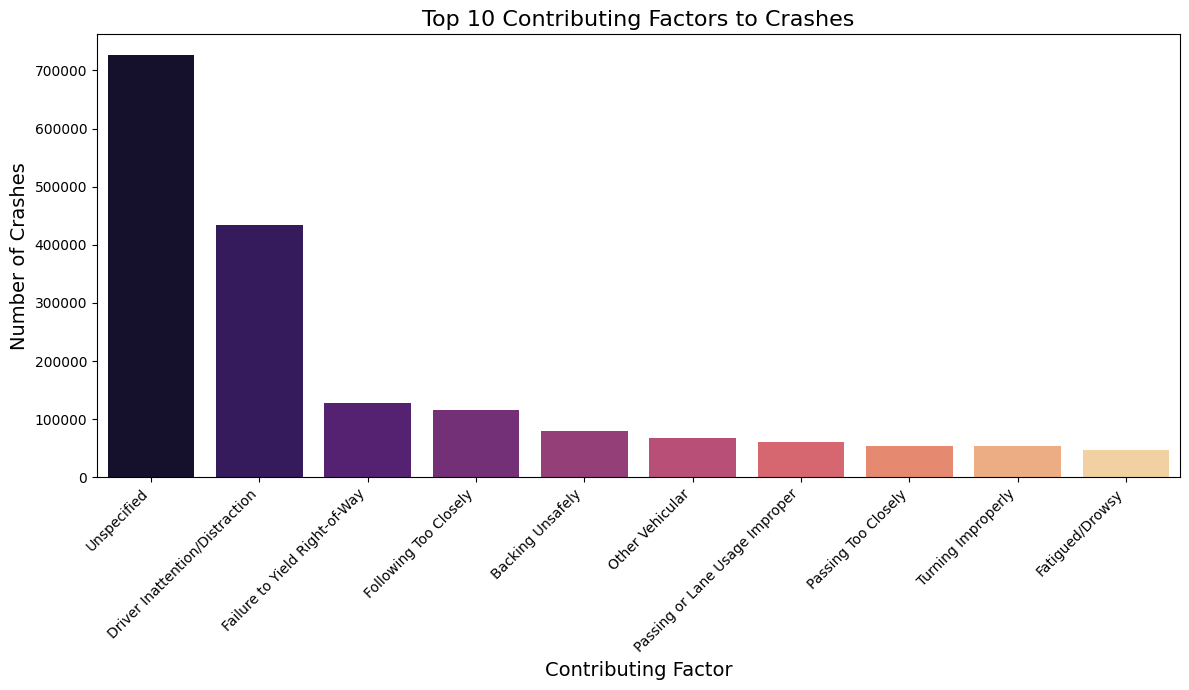

In [7]:
#Chart displaying top 10 contributing factors to crashes in the dataset
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))

sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma", hue=top_factors.index, legend=False)
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factor', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 3 contributing factors omitting unspecified:

> *  Driver Inattention/Distraction
> *  Failure to Yield Right-of-Way
> *  Following Too Closely

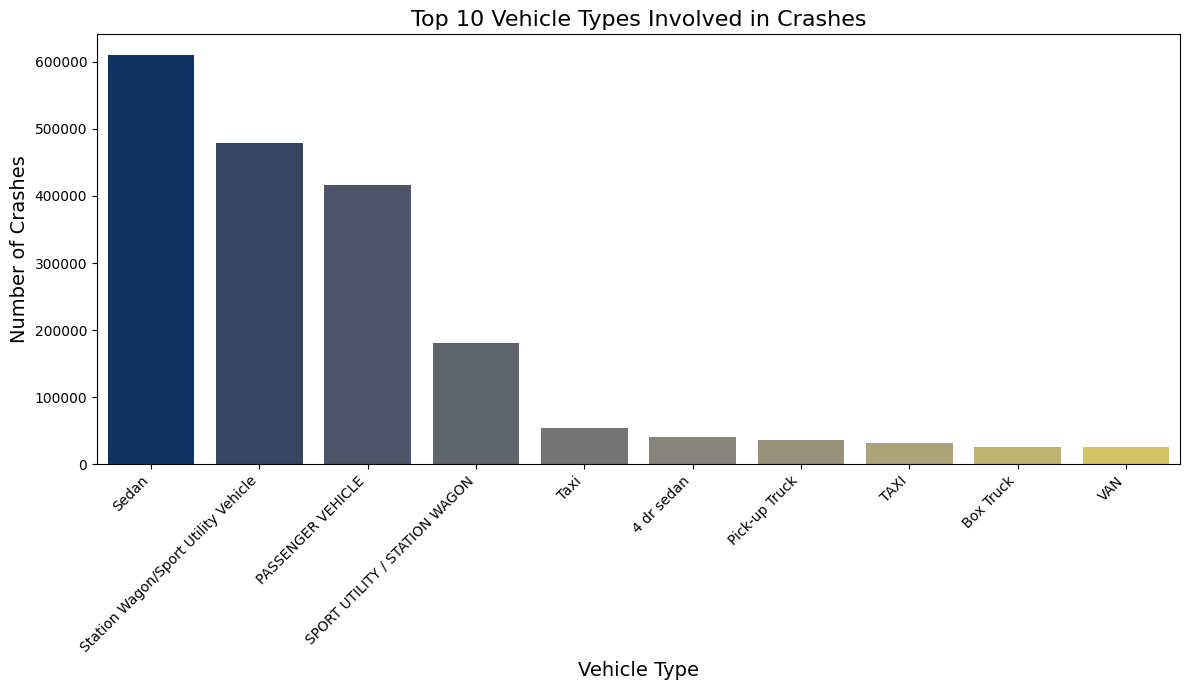

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis", hue=top_vehicle_types.index, legend=False)
plt.title('Top 10 Vehicle Types Involved in Crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


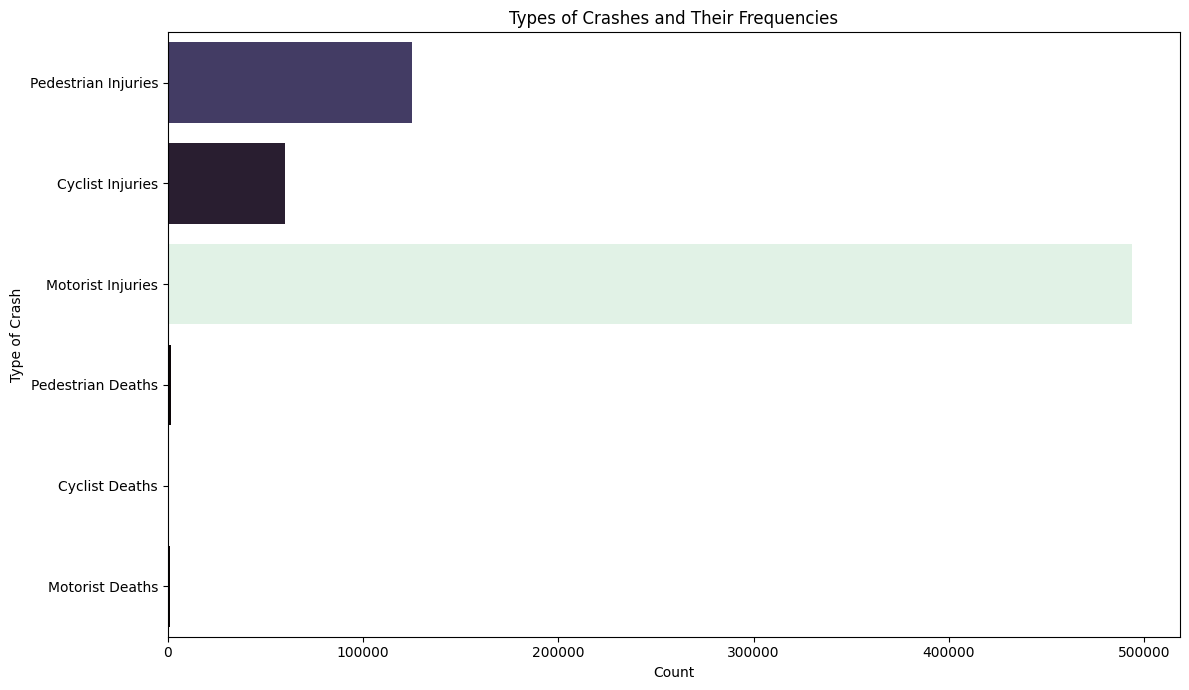

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating injury and mortality data
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['Crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako", hue='Count',legend=False)
plt.title('Types of Crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of Crash')
plt.tight_layout()
plt.show()


---

##Time Series Analysis

<ipython-input-10-eb983eb8ccc0>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


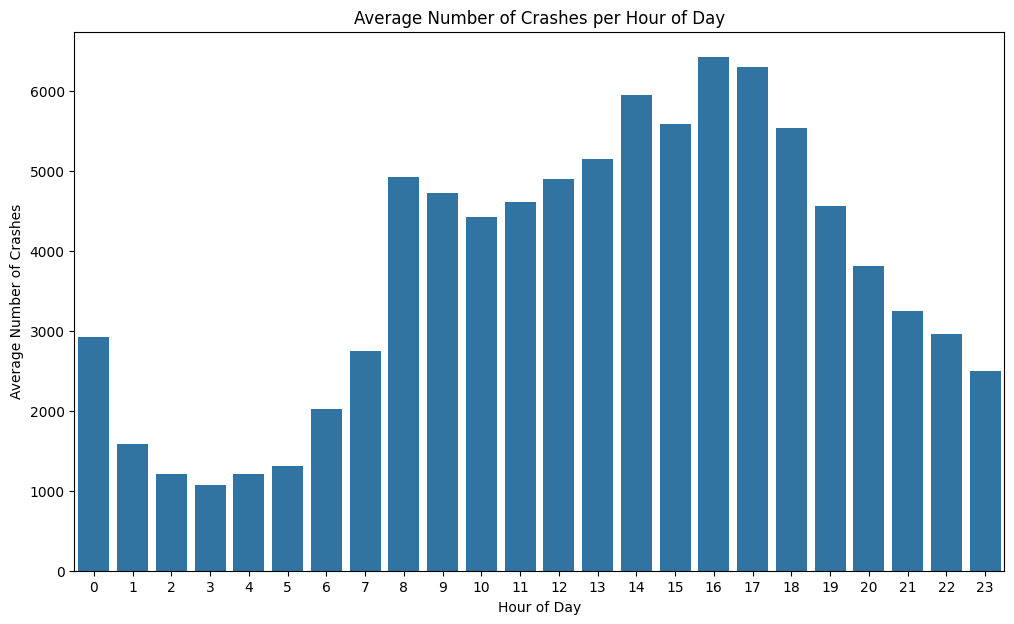

In [ ]:
# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Groups by 'Hour of Day' to calculate the average number of crashes per hour of the day
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# Plots the average number of crashes
plt.figure(figsize=(12, 7))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of Crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Crashes')
plt.xticks(range(0, 24))
plt.show()




 * From 4pm-4:59pm and 5pm-5:59pm is the time of day with the highest average number of crashes per hour. This may be due to the fact that this is rush hour. There will be an increased number of cars on the road and people may be driving recklessly to arrive home more quickly.


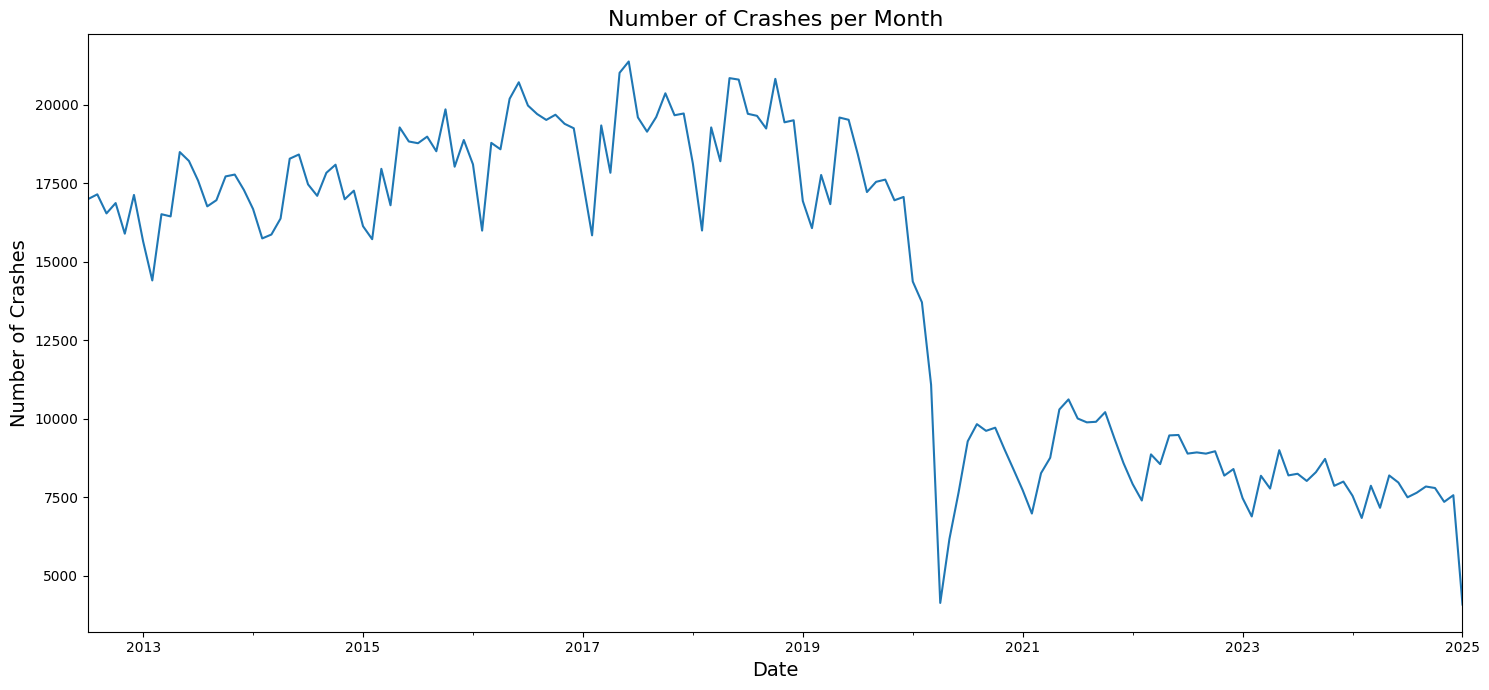

In [ ]:
# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Groups by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Time plot
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

> *  The graph shows that the number of crashes per month dramatically dropped due to COVID-19. This is likely due to the lockdown preventing people from going out, and also the switch to remote work and classes which drastically reduced the number of commuters. More interestingly, however, is the fact the decrease in collisions has continued even several years after the COVID-19 pandemic. This is possibly due to the continued switch to remote work for many positions, permanently reducing the number of commuters on the road.



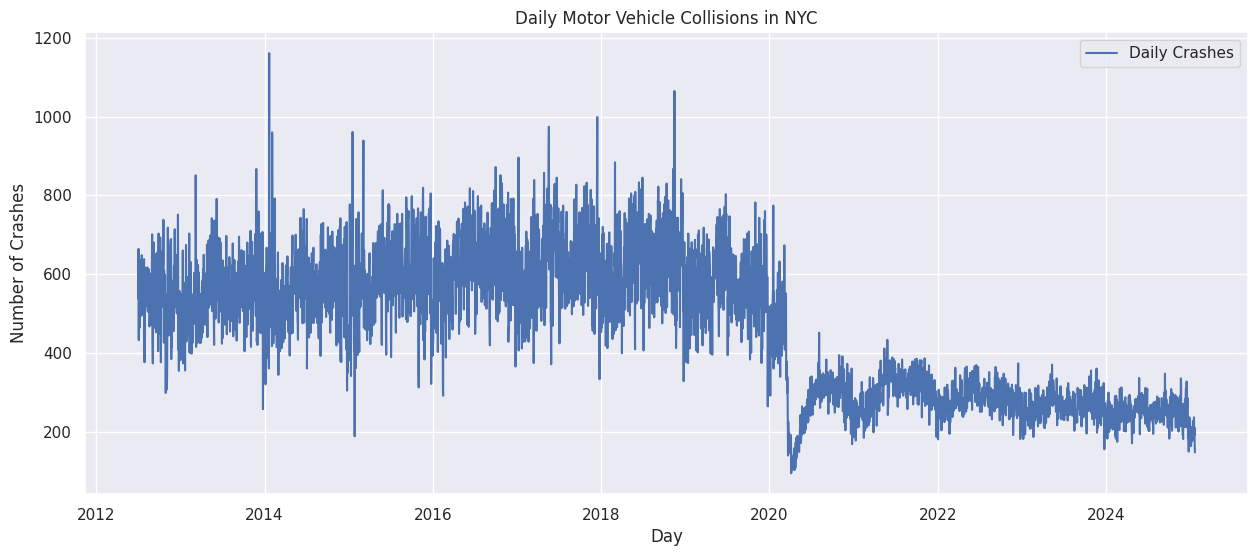

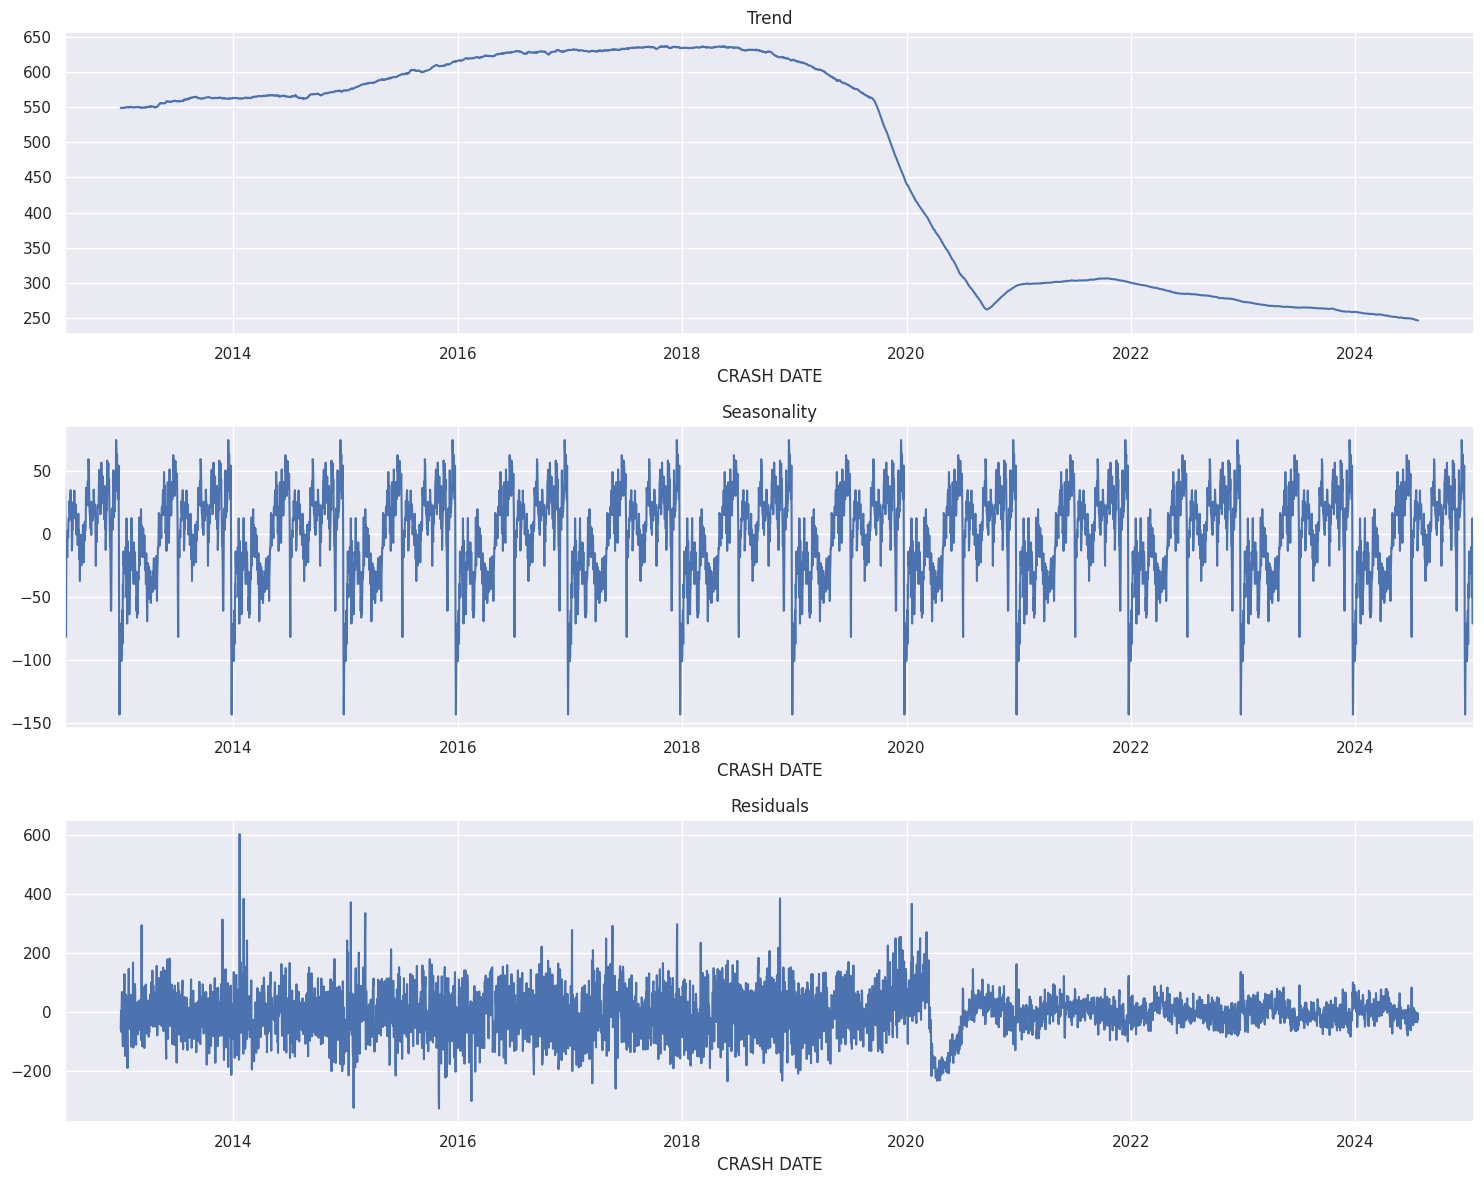

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregates number of crashes on each day
daily_crashes = data.groupby('CRASH DATE').size()

sns.set(style="darkgrid")

# Plots the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily Crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Day')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decomposes the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plots the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

> * Based on the trend graph, we have seen an overall decrease in crashes between 2014 and 2022. From 2014 to 2018, we saw a slight increase in crashes. However, from 2018 to 2022 we see a dramatic decrease in crashes with the onset of the COVID-19 pandemic.
> * There was a significant unpredicted fluctuation in 2020, shown by the dramatic spike in negative residuals (meaning the model was consistently predicting too many daily crashes). This aligns with the COVID-19 pandemic onset, which caused an unexpected and sudden drop in crashes that the model likely couldn't predict accurately.

---

##Geospatial Analysis

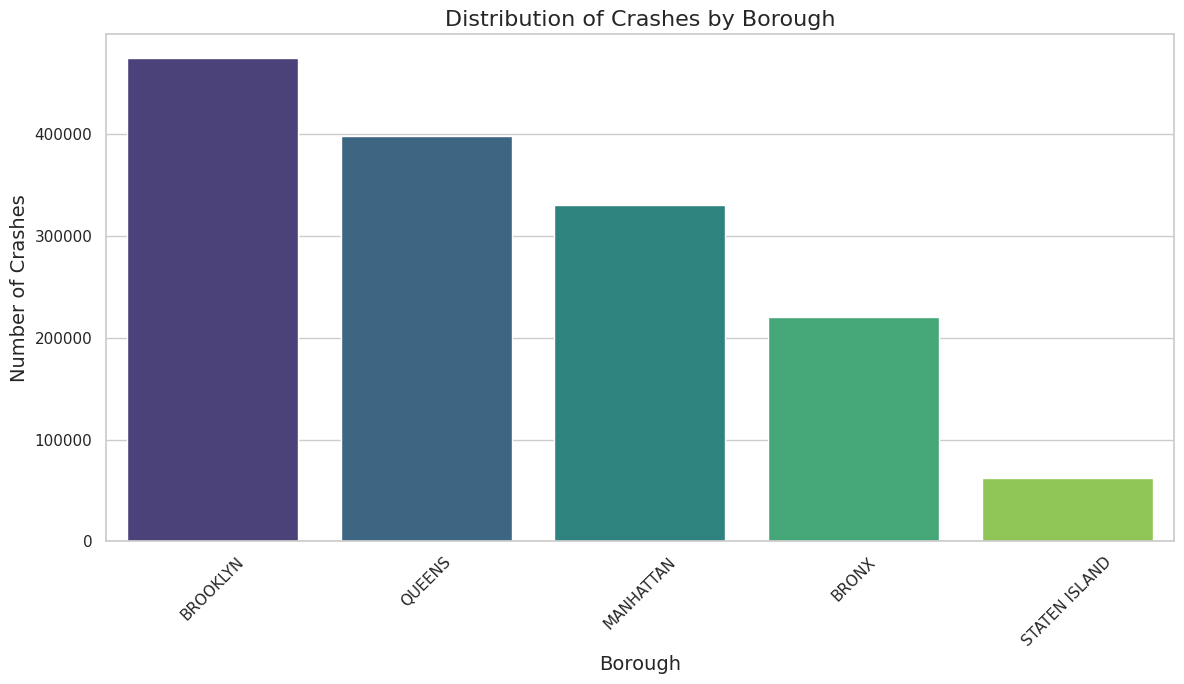

In [ ]:
# Counts number of records in each borough
borough_count = data['BOROUGH'].value_counts()

# Plots the distribution of crashes by borough
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis", hue=borough_count.index,legend=False)
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()] # List comprehension
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


In [ ]:
# Samples a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Creates a base map, coordinates centered at NYC
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Adds crashes to the heat map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "Red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "Yellow"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "Green"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

m_severity.save("severity.html")


##Collision Contributing Factors & Income Analysis


In [ ]:
# Read Census Income Data
income = pd.read_csv('/content/drive/MyDrive/TDSP_Project/Census Income Data.csv')

# Cleaning income data
# Remove the first row
income = income.iloc[1:]

# Extract zip codes from the 'NAME' column using split
income['ZIP CODE'] = income['NAME'].str.split('ZCTA5 ').str[1].str.split().str[0]

# Get the median income from B19013_001E column
income['MEDIAN INCOME'] = pd.to_numeric(income['B19013_001E'], errors='coerce')

# Income buckets based on Census Bureau's household income quintiles for NYC metropolitan area (2023)
income['INCOME BRACKET'] = pd.cut(income['MEDIAN INCOME'],
                               bins=[0, 41000, 89000, 165000, 250000],
                               labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle'])

# Remove all columns besides cleaned ones
income = income.loc[:, ['ZIP CODE', 'MEDIAN INCOME', 'INCOME BRACKET']].dropna().reset_index(drop=True)

# Cleaning collision data
# Drop rows with NA Zip Codes from collision data and resets index
crash_data_cleaned = data.dropna(subset=['ZIP CODE']).reset_index(drop=True)

# Convert Zip Codes to strings and removes decimals
crash_data_cleaned['ZIP CODE'] = crash_data_cleaned['ZIP CODE'].astype(str).str.split('.').str[0]

# Merge income data with collision data (with all NA removed on zip code column) based on ZIP CODE
merged_data = crash_data_cleaned.merge(
    right=income,
    left_on='ZIP CODE',
    right_on='ZIP CODE',
    how='inner'
)

---

<ipython-input-32-cdb9b80567fc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['INCOME BRACKET', 'CONTRIBUTING FACTOR VEHICLE 1'])
<ipython-input-32-cdb9b80567fc>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('INCOME BRACKET')
<ipython-input-32-cdb9b80567fc>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_income = percentage_data.groupby('INCOME BRACKET')['count'].transform('sum')



Top causes in Low income areas:
    CONTRIBUTING FACTOR VEHICLE 1  count  percentage
0   Failure to Yield Right-of-Way   5392   15.497816
1                 Other Vehicular   5391   15.494941
2                Backing Unsafely   4876   14.014716
3           Following Too Closely   3896   11.197977
4             Passing Too Closely   3561   10.235112
5              Turning Improperly   2969    8.533571
6  Passing or Lane Usage Improper   2707    7.780524
7     Traffic Control Disregarded   2424    6.967119
8            Unsafe Lane Changing   1803    5.182226
9             Driver Inexperience   1773    5.095999

Top causes in Lower-Middle income areas:
    CONTRIBUTING FACTOR VEHICLE 1  count  percentage
0   Failure to Yield Right-of-Way  50949   23.009909
1                Backing Unsafely  33445   15.104642
2           Following Too Closely  24706   11.157880
3                 Other Vehicular  20764    9.377569
4             Passing Too Closely  19671    8.883941
5  Passing or Lane Usage

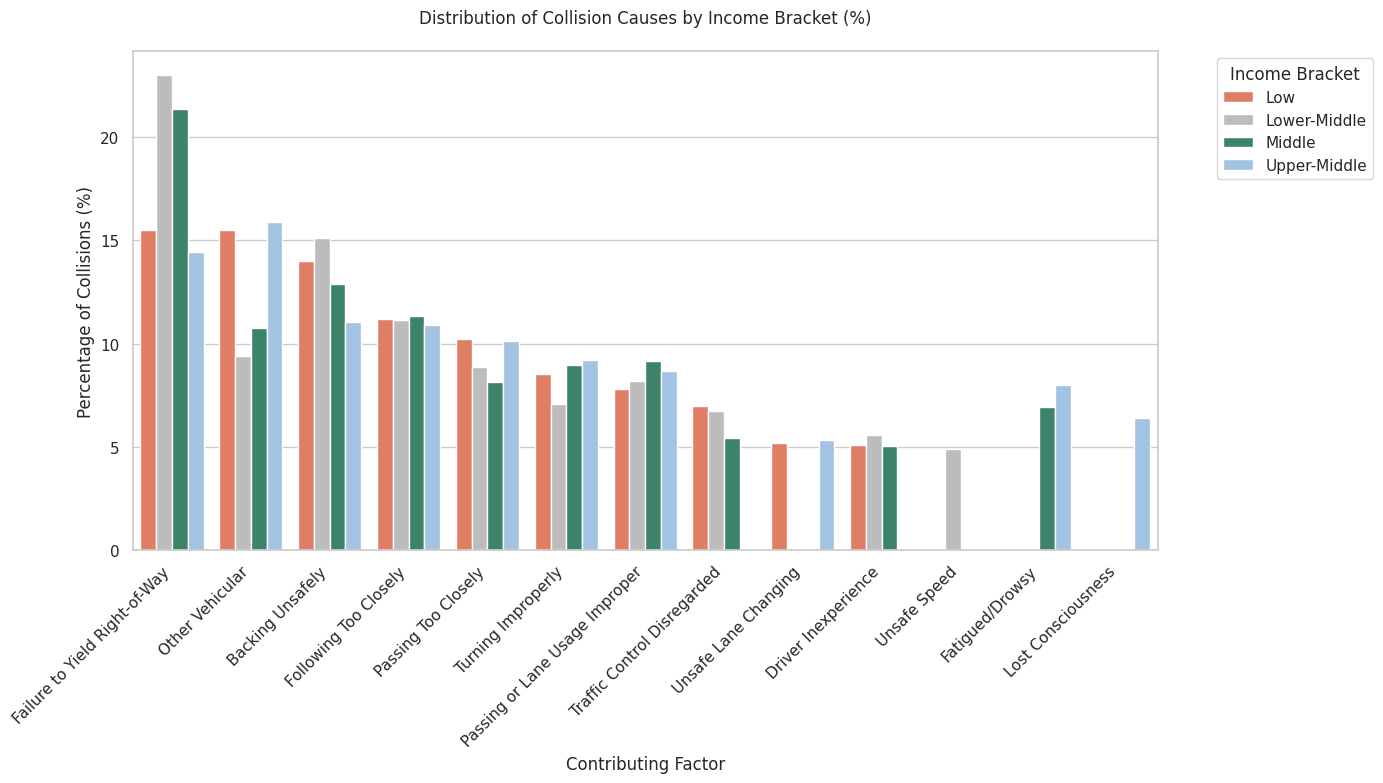

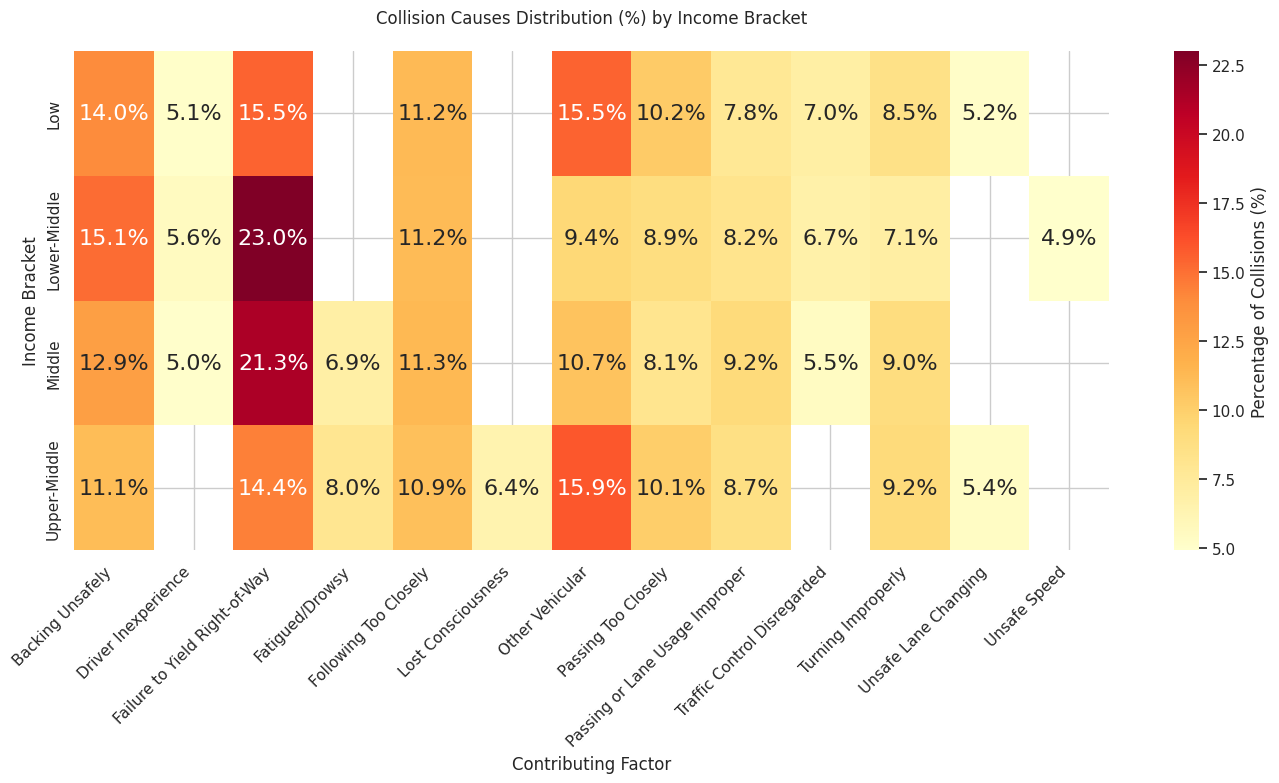

In [ ]:
# Find top contributing factors for each income bracket
# Group by income bracket and get the count of each contributing factor. Filters out "Unspecified" & "Driver Inattention" and drops NA's
# Driver Inattention filtered out as it too heavily skewed the data, made insights difficult to see visually
causes_by_income = (merged_data[(merged_data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified') &
                               (merged_data['CONTRIBUTING FACTOR VEHICLE 1'] != 'Driver Inattention/Distraction')]
                   .dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1'])
                   .groupby(['INCOME BRACKET', 'CONTRIBUTING FACTOR VEHICLE 1'])
                   .size()
                   .reset_index(name='count'))

# For each income bracket, get the top 10 causes
top_causes_by_income = (causes_by_income.sort_values(['INCOME BRACKET', 'count'], ascending=[True, False])
                       .groupby('INCOME BRACKET')
                       .head(10))

# Calculate percentages within each income bracket
percentage_data = top_causes_by_income.copy()
total_by_income = percentage_data.groupby('INCOME BRACKET')['count'].transform('sum')
percentage_data['percentage'] = (percentage_data['count'] / total_by_income) * 100

# Display the text results with percentages
for bracket in percentage_data['INCOME BRACKET'].unique():
    print(f"\nTop causes in {bracket} income areas:")
    print(percentage_data[percentage_data['INCOME BRACKET'] == bracket]
          [['CONTRIBUTING FACTOR VEHICLE 1', 'count', 'percentage']]
          .reset_index(drop=True))

# Create percentage-based bar chart
plt.figure(figsize=(14, 8))

# Define colorblind-friendly custom palette
palette = ['#f47051', '#bcbcbc', '#318f6c', '#98c4ec',]

sns.barplot(data=percentage_data,
            x='CONTRIBUTING FACTOR VEHICLE 1',
            y='percentage',
            hue='INCOME BRACKET',
            palette=palette)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Collision Causes by Income Bracket (%)', pad=20)
plt.xlabel('Contributing Factor')
plt.ylabel('Percentage of Collisions (%)')
plt.legend(title='Income Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create percentage-based heatmap
percentage_plot_data = percentage_data.pivot(index='INCOME BRACKET',
                                           columns='CONTRIBUTING FACTOR VEHICLE 1',
                                           values='percentage')

plt.figure(figsize=(14, 8))

sns.heatmap(percentage_plot_data,
            annot=[[f'{val:.1f}%' for val in row] for row in percentage_plot_data.values],
            fmt='',
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Collisions (%)'},
            annot_kws={'size': 16})

plt.title('Collision Causes Distribution (%) by Income Bracket', pad=20)
plt.xlabel('Contributing Factor')
plt.ylabel('Income Bracket')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
---